In [799]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from matplotlib.dates import date2num

# IT Asset Inventory: Exploratory Data Analysis

## Table of Contents
1. Introduction
2. Dataset Overview
3. Data Cleaning Summary
4. Exploratory Data Analysis
    - EDA Overview
    - Visualisation Analysis
5. Key Recommendations

## Introduction
The aim of this project is to investigate a simulated IT asset inventory data from an organisation. The goal is to uncover patterns in asset costs, usage duration, and e-waste, and provide actionable insights for improving the asset management strategies.

---
## Dataset Overview

In [577]:
df = pd.read_csv(r"C:\Users\User\Desktop\IT Assets EDA\data\uom_it_asset_inventory.csv")
df

,Asset sticker,Req/PO/Ticket No.,Serial No.,Date ordered,Type,Ordered By,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,ER-60144,Xo21333XQ,14/08/2021,Desktop,Jack Anderson,david.brown@unimelb.edu.au,5741,Physio,6/12/2021,7/11/2022,Y,1773.70
1,UOM000002,qi-49637,xV79852uh,12/12/2020,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Social Work,13/06/2023,23/07/2024,N,624.71
2,UOM000003,Op-84786,Tc63630Ea,17/05/2022,Tablet,David Brown,frank.miller@unimelb.edu.au,3991,SHS,14/12/2023,26/04/2025,N,843.50
3,UOM000004,pf-98789,nO98812pD,16/08/2020,Tablet,Ivy Taylor,bob.smith@unimelb.edu.au,5312,SHS,14/09/2021,22/12/2023,Y,380.45
4,UOM000005,Oq-99520,tX43445dr,14/09/2023,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Nursing,3/03/2024,21/07/2024,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,pT-10830,gk00172vq,4/08/2023,Printer,Bob Smith,jack.anderson@unimelb.edu.au,9503,Physio,17/05/2024,NaN,N,1176.15
1996,UOM001997,TS-63399,jJ16971Wq,17/07/2021,Monitor,Grace Wilson,alice.johnson@unimelb.edu.au,2417,Physio,4/11/2023,NaN,N,288.30
1997,UOM001998,bF-11083,ly92273ok,7/11/2021,Desktop,Henry Moore,carol.williams@unimelb.edu.au,6271,Physio,18/04/2025,26/04/2025,N,1946.89
1998,UOM001999,uR-63425,ny16188ac,13/06/2020,Printer,David Brown,ivy.taylor@unimelb.edu.au,1354,Social Work,9/07/2021,13/10/2024,N,941.09


In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Asset sticker      2000 non-null   object 
 1   Req/PO/Ticket No.  2000 non-null   object 
 2   Serial No.         2000 non-null   object 
 3   Date ordered       2000 non-null   object 
 4   Type               2000 non-null   object 
 5   Ordered By         2000 non-null   object 
 6   Assigned email     2000 non-null   object 
 7   Staff ID           2000 non-null   int64  
 8   Department         2000 non-null   object 
 9   Date assigned      2000 non-null   object 
 10  Date returned      1386 non-null   object 
 11  e-wasted? Y/N      2000 non-null   object 
 12  Cost               2000 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 203.3+ KB


In [581]:
df.describe()

,Staff ID,Cost
count,2000.000000,2000.000000
mean,5742.504500,1787.833305
std,2571.748847,2093.585917
min,1354.000000,102.620000
25%,3991.000000,555.340000
50%,5741.000000,1022.055000
75%,8089.000000,2081.230000
max,9503.000000,9962.350000


---
## Data Cleaning Summary

### Check and Remove duplicates

In [585]:
df.duplicated().sum()
df = df.drop_duplicates()

### Set the Asset sticker as the index because it is a unique identifier

In [588]:
df.set_index('Asset sticker')

,Req/PO/Ticket No.,Serial No.,Date ordered,Type,Ordered By,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
Asset sticker,,,,,,,,,,,,
UOM000001,ER-60144,Xo21333XQ,14/08/2021,Desktop,Jack Anderson,david.brown@unimelb.edu.au,5741,Physio,6/12/2021,7/11/2022,Y,1773.70
UOM000002,qi-49637,xV79852uh,12/12/2020,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Social Work,13/06/2023,23/07/2024,N,624.71
UOM000003,Op-84786,Tc63630Ea,17/05/2022,Tablet,David Brown,frank.miller@unimelb.edu.au,3991,SHS,14/12/2023,26/04/2025,N,843.50
UOM000004,pf-98789,nO98812pD,16/08/2020,Tablet,Ivy Taylor,bob.smith@unimelb.edu.au,5312,SHS,14/09/2021,22/12/2023,Y,380.45
UOM000005,Oq-99520,tX43445dr,14/09/2023,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Nursing,3/03/2024,21/07/2024,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
UOM001996,pT-10830,gk00172vq,4/08/2023,Printer,Bob Smith,jack.anderson@unimelb.edu.au,9503,Physio,17/05/2024,NaN,N,1176.15
UOM001997,TS-63399,jJ16971Wq,17/07/2021,Monitor,Grace Wilson,alice.johnson@unimelb.edu.au,2417,Physio,4/11/2023,NaN,N,288.30
UOM001998,bF-11083,ly92273ok,7/11/2021,Desktop,Henry Moore,carol.williams@unimelb.edu.au,6271,Physio,18/04/2025,26/04/2025,N,1946.89


### Remove unnecessary columns:
- `Req/PO/Ticket No.` and `Serial No.` are unnecessary for any analysis, so are removed.

In [591]:
df = df.drop(columns = ['Req/PO/Ticket No.', 'Serial No.'])
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,14/08/2021,Desktop,Jack Anderson,david.brown@unimelb.edu.au,5741,Physio,6/12/2021,7/11/2022,Y,1773.70
1,UOM000002,12/12/2020,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Social Work,13/06/2023,23/07/2024,N,624.71
2,UOM000003,17/05/2022,Tablet,David Brown,frank.miller@unimelb.edu.au,3991,SHS,14/12/2023,26/04/2025,N,843.50
3,UOM000004,16/08/2020,Tablet,Ivy Taylor,bob.smith@unimelb.edu.au,5312,SHS,14/09/2021,22/12/2023,Y,380.45
4,UOM000005,14/09/2023,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Nursing,3/03/2024,21/07/2024,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,4/08/2023,Printer,Bob Smith,jack.anderson@unimelb.edu.au,9503,Physio,17/05/2024,NaN,N,1176.15
1996,UOM001997,17/07/2021,Monitor,Grace Wilson,alice.johnson@unimelb.edu.au,2417,Physio,4/11/2023,NaN,N,288.30
1997,UOM001998,7/11/2021,Desktop,Henry Moore,carol.williams@unimelb.edu.au,6271,Physio,18/04/2025,26/04/2025,N,1946.89
1998,UOM001999,13/06/2020,Printer,David Brown,ivy.taylor@unimelb.edu.au,1354,Social Work,9/07/2021,13/10/2024,N,941.09


### Update the data types (e.g., `Date ordered` should be of type datetime)

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Asset sticker   2000 non-null   object 
 1   Date ordered    2000 non-null   object 
 2   Type            2000 non-null   object 
 3   Ordered By      2000 non-null   object 
 4   Assigned email  2000 non-null   object 
 5   Staff ID        2000 non-null   int64  
 6   Department      2000 non-null   object 
 7   Date assigned   2000 non-null   object 
 8   Date returned   1386 non-null   object 
 9   e-wasted? Y/N   2000 non-null   object 
 10  Cost            2000 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 172.0+ KB


In [596]:
df['Date ordered'] = pd.to_datetime(df['Date ordered'], dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Asset sticker   2000 non-null   object        
 1   Date ordered    2000 non-null   datetime64[ns]
 2   Type            2000 non-null   object        
 3   Ordered By      2000 non-null   object        
 4   Assigned email  2000 non-null   object        
 5   Staff ID        2000 non-null   int64         
 6   Department      2000 non-null   object        
 7   Date assigned   2000 non-null   object        
 8   Date returned   1386 non-null   object        
 9   e-wasted? Y/N   2000 non-null   object        
 10  Cost            2000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 172.0+ KB


### `Staff ID` is not used for calculations, so can be converted to type object

In [599]:
df['Staff ID'] = df['Staff ID'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Asset sticker   2000 non-null   object        
 1   Date ordered    2000 non-null   datetime64[ns]
 2   Type            2000 non-null   object        
 3   Ordered By      2000 non-null   object        
 4   Assigned email  2000 non-null   object        
 5   Staff ID        2000 non-null   object        
 6   Department      2000 non-null   object        
 7   Date assigned   2000 non-null   object        
 8   Date returned   1386 non-null   object        
 9   e-wasted? Y/N   2000 non-null   object        
 10  Cost            2000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 172.0+ KB


### Set the `Date Assigned` and `Date returned` to datetime

In [602]:
df['Date assigned'] = pd.to_datetime(df['Date assigned'], dayfirst = True)

In [604]:
df['Date returned'] = pd.to_datetime(df['Date returned'], dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Asset sticker   2000 non-null   object        
 1   Date ordered    2000 non-null   datetime64[ns]
 2   Type            2000 non-null   object        
 3   Ordered By      2000 non-null   object        
 4   Assigned email  2000 non-null   object        
 5   Staff ID        2000 non-null   object        
 6   Department      2000 non-null   object        
 7   Date assigned   2000 non-null   datetime64[ns]
 8   Date returned   1386 non-null   datetime64[ns]
 9   e-wasted? Y/N   2000 non-null   object        
 10  Cost            2000 non-null   float64       
dtypes: datetime64[ns](3), float64(1), object(7)
memory usage: 172.0+ KB


In [606]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


### Column Splitting:
- The assigned email is not as useful as having the names of the inviduals who the device was assigned to.
- Fortunately, the first and last name are used for the emails, so we can extract that information from it to create a new
  'Assigned name` column.
- Start by getting the index of the `Ordered By` column to insert the new column

In [609]:
ordered_col_index = df.columns.get_loc('Ordered By')
df.insert(ordered_col_index + 1, 'Assigned name', None)

In [611]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,None,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,None,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,None,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,None,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,None,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,None,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,None,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,None,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,None,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


In [613]:
df['Assigned name'] = df['Assigned email'].str.extract(r"(.+?(?=@))")

In [615]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,david.brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,carol.williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,frank.miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,bob.smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,carol.williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,jack.anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,alice.johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,carol.williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,ivy.taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


In [617]:
df['Assigned name'] = df['Assigned name'].str.replace('.', ' ')
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,david brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,carol williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,frank miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,bob smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,carol williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,jack anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,alice johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,carol williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,ivy taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


In [619]:
df['Assigned name'] = df['Assigned name'].str.title()

In [621]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


### Standardization:
- Clean the string columns by removing whitespaces and standardizing the text.

In [624]:
df['Department'] = df['Department'].str.strip()
df['Ordered By'] = df['Ordered By'].str.strip().str.title()

In [626]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


### Validity Checks:
- Make sure that date assigned is greater than date ordered (all appear to be valid as it outputs all 2000 rows)

In [629]:
df[df['Date assigned'] >= df['Date ordered']]

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


### Check if cost values are all positive

In [632]:
df[df['Cost'] > 0]

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09


### Column Derivation:
- For further analysis, derive useful columns such as:
    - `Days in use`
    - `Year ordered`
    - `Month ordered`

In [635]:
df['Days in use'] = (df['Date returned'] - df['Date assigned']).dt.days
df['Year ordered'] = df['Date ordered'].dt.year
df['Month ordered'] = df['Date ordered'].dt.month

In [637]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost,Days in use,Year ordered,Month ordered
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70,336.0,2021,8
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71,406.0,2020,12
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50,499.0,2022,5
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45,829.0,2020,8
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06,140.0,2023,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15,NaN,2023,8
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30,NaN,2021,7
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89,8.0,2021,11
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09,1192.0,2020,6


### Map `Is e-wasted` to boolean values

In [640]:
df['Is e-wasted'] = df['e-wasted? Y/N'].map({'Y': True, 'N': False})

In [642]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,e-wasted? Y/N,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,Y,1773.70,336.0,2021,8,True
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,N,624.71,406.0,2020,12,False
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,N,843.50,499.0,2022,5,False
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,Y,380.45,829.0,2020,8,True
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,N,1033.06,140.0,2023,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,N,1176.15,NaN,2023,8,False
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,N,288.30,NaN,2021,7,False
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,N,1946.89,8.0,2021,11,False
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,N,941.09,1192.0,2020,6,False


In [644]:
df = df.drop(columns = ['e-wasted? Y/N'])

In [646]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,1773.70,336.0,2021,8,True
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,624.71,406.0,2020,12,False
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,843.50,499.0,2022,5,False
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,380.45,829.0,2020,8,True
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,1033.06,140.0,2023,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,1176.15,NaN,2023,8,False
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,288.30,NaN,2021,7,False
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,1946.89,8.0,2021,11,False
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,941.09,1192.0,2020,6,False


In [797]:
df['Is e-wasted'].dtype

dtype('bool')

In [650]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,1773.70,336.0,2021,8,True
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,624.71,406.0,2020,12,False
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,843.50,499.0,2022,5,False
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,380.45,829.0,2020,8,True
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,1033.06,140.0,2023,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,1176.15,NaN,2023,8,False
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,288.30,NaN,2021,7,False
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,1946.89,8.0,2021,11,False
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,941.09,1192.0,2020,6,False


In [652]:
df['Department'] = df['Department'].astype('category') #Update the Department column to allow for grouping

In [654]:
df

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
0,UOM000001,2021-08-14,Desktop,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-12-06,2022-11-07,1773.70,336.0,2021,8,True
1,UOM000002,2020-12-12,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Social Work,2023-06-13,2024-07-23,624.71,406.0,2020,12,False
2,UOM000003,2022-05-17,Tablet,David Brown,Frank Miller,frank.miller@unimelb.edu.au,3991,SHS,2023-12-14,2025-04-26,843.50,499.0,2022,5,False
3,UOM000004,2020-08-16,Tablet,Ivy Taylor,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-09-14,2023-12-22,380.45,829.0,2020,8,True
4,UOM000005,2023-09-14,Tablet,Ivy Taylor,Carol Williams,carol.williams@unimelb.edu.au,6271,Nursing,2024-03-03,2024-07-21,1033.06,140.0,2023,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,UOM001996,2023-08-04,Printer,Bob Smith,Jack Anderson,jack.anderson@unimelb.edu.au,9503,Physio,2024-05-17,NaT,1176.15,NaN,2023,8,False
1996,UOM001997,2021-07-17,Monitor,Grace Wilson,Alice Johnson,alice.johnson@unimelb.edu.au,2417,Physio,2023-11-04,NaT,288.30,NaN,2021,7,False
1997,UOM001998,2021-11-07,Desktop,Henry Moore,Carol Williams,carol.williams@unimelb.edu.au,6271,Physio,2025-04-18,2025-04-26,1946.89,8.0,2021,11,False
1998,UOM001999,2020-06-13,Printer,David Brown,Ivy Taylor,ivy.taylor@unimelb.edu.au,1354,Social Work,2021-07-09,2024-10-13,941.09,1192.0,2020,6,False


## Data Cleaning Complete

All preprocessing steps have been successfully executed. The dataset is now ready for exploratory data analysis (EDA).



---
# Exploratory Data Analysis
---

### EDA Overview:

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Asset sticker   2000 non-null   object        
 1   Date ordered    2000 non-null   datetime64[ns]
 2   Type            2000 non-null   object        
 3   Ordered By      2000 non-null   object        
 4   Assigned name   2000 non-null   object        
 5   Assigned email  2000 non-null   object        
 6   Staff ID        2000 non-null   object        
 7   Department      2000 non-null   category      
 8   Date assigned   2000 non-null   datetime64[ns]
 9   Date returned   1386 non-null   datetime64[ns]
 10  Cost            2000 non-null   float64       
 11  Days in use     1386 non-null   float64       
 12  Year ordered    2000 non-null   int32         
 13  Month ordered   2000 non-null   int32         
 14  Is e-wasted     2000 non-null   bool          
dtypes: b

- **No null values present.**
- Many missing values for `Date returned` and `Days in use`, but this makes sense if the asset has not been returned yet.

In [662]:
df.describe()

,Date ordered,Date assigned,Date returned,Cost,Days in use,Year ordered,Month ordered
count,2000,2000,1386,2000.000000,1386.000000,2000.000000,2000.000000
mean,2022-11-05 01:50:09.600000,2024-02-09 10:10:33.600000,2024-09-26 02:03:38.181818112,1787.833305,237.805195,2022.348000,6.475500
min,2020-05-17 00:00:00,2020-06-07 00:00:00,2021-01-27 00:00:00,102.620000,0.000000,2020.000000,1.000000
25%,2021-08-24 00:00:00,2023-05-22 18:00:00,2024-06-10 06:00:00,555.340000,43.000000,2021.000000,4.000000
50%,2022-10-19 12:00:00,2024-06-11 00:00:00,2025-01-11 00:00:00,1022.055000,138.000000,2022.000000,6.000000
75%,2024-02-01 00:00:00,2025-01-06 00:00:00,2025-04-05 00:00:00,2081.230000,329.750000,2024.000000,9.000000
max,2025-05-16 00:00:00,2025-05-16 00:00:00,2025-05-16 00:00:00,9962.350000,1670.000000,2025.000000,12.000000
std,NaN,NaN,NaN,2093.585917,272.100193,1.479186,3.431514


- **Mean Asset Cost:** `$1,787.83`  
  While informative, the mean is influenced by high-cost outliers and some assets cost as much as `$9,962.35`.

- **Median Asset Cost:** `$1,022.06`  
  The median provides a more reliable measure of the 'typical' asset cost, as it is not distorted by extreme values.

- **Average Days In Use:**  
  The average asset is in use for only `43 days`, but can go up to 1670 days.


In [665]:
df['Department'].value_counts()

Department
Social Work    423
SHS            413
Nursing        411
DOVS           383
Physio         370
Name: count, dtype: int64

In [667]:
df['Type'].value_counts()

Type
Laptop     309
Server     295
Desktop    281
Monitor    281
Tablet     280
Phone      278
Printer    276
Name: count, dtype: int64

### Unique Values Analysis:

In [672]:
df.nunique()

Asset sticker     2000
Date ordered      1214
Type                 7
Ordered By          10
Assigned name       10
Assigned email      10
Staff ID            10
Department           5
Date assigned      968
Date returned      561
Cost              1990
Days in use        580
Year ordered         6
Month ordered       12
Is e-wasted          2
dtype: int64

- There are `7` unique types of assets.
- And `10` people doing the ordering.
- There are `10` staff members.
    - This is likely due to the dataset generation limitations.
- Finally, there are `5` unique departments.

### Longest Active Assets:

In [97]:
df.sort_values(by = "Days in use", ascending = False).head()

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
963,UOM000964,2020-09-02,Server,Jack Anderson,Emma Jones,emma.jones@unimelb.edu.au,8089,Physio,2020-09-04,2025-04-01,7602.44,1670.0,2020,9,False
715,UOM000716,2020-07-28,Desktop,Grace Wilson,Grace Wilson,grace.wilson@unimelb.edu.au,8826,Social Work,2021-02-27,2025-04-28,1950.31,1521.0,2020,7,False
1135,UOM001136,2021-02-19,Printer,Jack Anderson,David Brown,david.brown@unimelb.edu.au,5741,Physio,2021-03-11,2025-04-22,450.84,1503.0,2021,2,False
1147,UOM001148,2020-10-24,Laptop,Carol Williams,Bob Smith,bob.smith@unimelb.edu.au,5312,SHS,2021-02-28,2025-02-21,1631.89,1454.0,2020,10,False
376,UOM000377,2020-05-27,Tablet,Frank Miller,David Brown,david.brown@unimelb.edu.au,5741,Social Work,2020-11-09,2024-09-05,424.04,1396.0,2020,5,False


### Most Expensive Assets that have not been E-wasted:

In [105]:
df_cost_sort = df.sort_values(by = "Cost", ascending = False).head(10)
df_filtered_cost = df_cost_sort[df_cost_sort['Is e-wasted'] == False]
df_filtered_cost

,Asset sticker,Date ordered,Type,Ordered By,Assigned name,Assigned email,Staff ID,Department,Date assigned,Date returned,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
407,UOM000408,2021-08-04,Server,Frank Miller,Emma Jones,emma.jones@unimelb.edu.au,8089,Social Work,2024-04-09,2025-02-08,9950.54,305.0,2021,8,False
1581,UOM001582,2025-02-27,Server,Jack Anderson,Grace Wilson,grace.wilson@unimelb.edu.au,8826,DOVS,2025-05-11,2025-05-12,9945.45,1.0,2025,2,False
1844,UOM001845,2025-05-16,Server,Ivy Taylor,Henry Moore,henry.moore@unimelb.edu.au,6300,SHS,2025-05-16,NaT,9915.47,NaN,2025,5,False
1120,UOM001121,2024-03-14,Server,Ivy Taylor,Henry Moore,henry.moore@unimelb.edu.au,6300,Nursing,2024-03-29,2024-09-12,9850.01,167.0,2024,3,False
263,UOM000264,2020-07-06,Server,Carol Williams,Bob Smith,bob.smith@unimelb.edu.au,5312,DOVS,2024-01-22,NaT,9817.14,NaN,2020,7,False
872,UOM000873,2023-03-09,Server,Emma Jones,Alice Johnson,alice.johnson@unimelb.edu.au,2417,SHS,2024-04-16,2024-09-27,9801.57,164.0,2023,3,False
58,UOM000059,2023-07-02,Server,Grace Wilson,Henry Moore,henry.moore@unimelb.edu.au,6300,Social Work,2024-12-23,NaT,9800.83,NaN,2023,7,False
579,UOM000580,2022-07-12,Server,Emma Jones,Jack Anderson,jack.anderson@unimelb.edu.au,9503,SHS,2023-06-14,2025-03-23,9800.50,648.0,2022,7,False


- **5 out of 8** of the most expensive assets (valued at approximately **$10k**)  
- that have **not** been e-wasted have already been **returned**.

### Staff members with the most assets assigned to them:

In [794]:
staff_asset_count = df.groupby(['Staff ID', 'Assigned name']).size().sort_values(ascending=False).head(5)
staff_asset_count

Staff ID  Assigned name
1354      Ivy Taylor       219
8826      Grace Wilson     215
2417      Alice Johnson    209
9503      Jack Anderson    208
5312      Bob Smith        207
dtype: int64

### Visualisation Analysis:

#### Correlation Analysis
    - Determine correlation between the numeric values

In [685]:
df_corr = df.corr(numeric_only = True)
df_corr

,Cost,Days in use,Year ordered,Month ordered,Is e-wasted
Cost,1.000000,-0.007862,0.023342,0.025586,0.006804
Days in use,-0.007862,1.000000,-0.487629,0.044988,0.075008
Year ordered,0.023342,-0.487629,1.000000,-0.263728,-0.315988
Month ordered,0.025586,0.044988,-0.263728,1.000000,0.028840
Is e-wasted,0.006804,0.075008,-0.315988,0.028840,1.000000


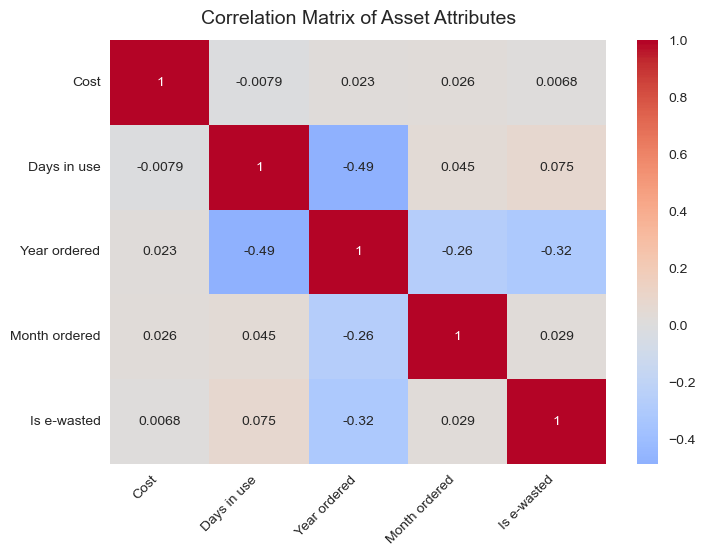

<Figure size 800x600 with 0 Axes>

In [691]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Asset Attributes", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(8, 6))
plt.show()

**Cost vs. Usage Duration**
- There does **not** appear to be a correlation between **`Cost`** and **`Days in Use`**.

**Asset Age vs. Usage Duration**
- There is an almost **-50% correlation** between the **year the asset was ordered** and **how many days it has been used**.
- This makes sense as newer assets will generally have been used for fewer days.
- The same pattern applies to **order year** and whether the asset has been **e-wasted**.

**Business Recommendations:** 
- No significant correlation between the values can be determined. No recommendation provided based on these results.

In [696]:
df['Type'].value_counts()

Type
Laptop     309
Server     295
Desktop    281
Monitor    281
Tablet     280
Phone      278
Printer    276
Name: count, dtype: int64

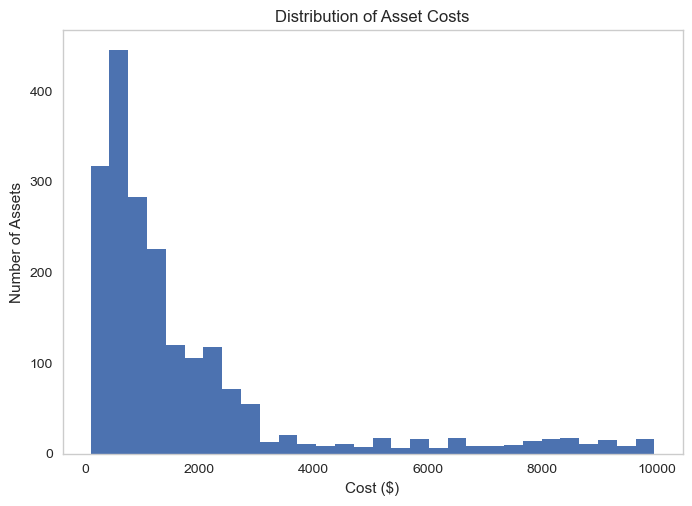

In [698]:
df['Cost'].hist(bins = 30)
plt.title('Distribution of Asset Costs')
plt.xlabel('Cost ($)')
plt.ylabel('Number of Assets')
plt.grid(False)
plt.show()

**Key Insights:** 
- It is a right-skewed distribution, with most assets costing below `$2.5k` with a steep drop-off after that point.  
- This makes sense as a large number of the assets are laptops, monitors and tablets.  
- There are some high-cost outliers reaching up to `$10k`. These are likely the specialized equipment such as servers.


**Business Recommendations:** 
- I recommend monitoring high-cost assets more closely, especially if these are rarely used.
- If cost management is a consideration, the efforts should be focused on a small set of high-value items due to the long tail.

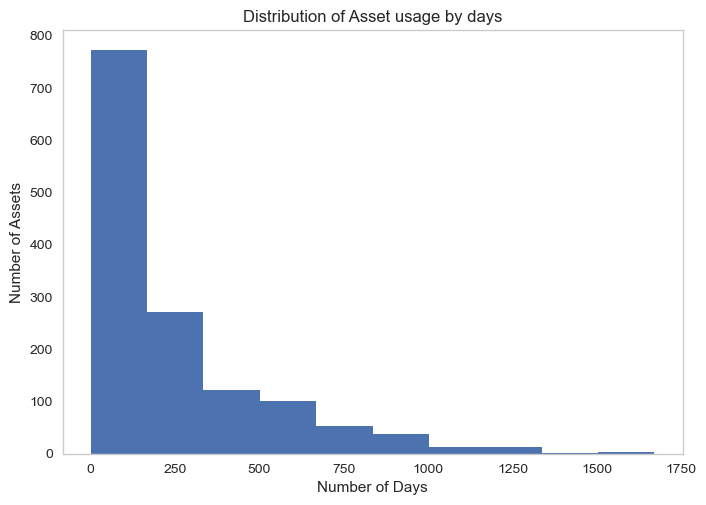

In [702]:
df['Days in use'].hist()
plt.title('Distribution of Asset usage by days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Assets')
plt.grid(False)
plt.show()

**Key Insights:** 
- It is also a right-skew distribution, indicating that most assets are used for a short period of time.
- Over `750` assets are used for less than `~200 days`.
- A long-tail exists, so a few assets are used for over '1000 days'.


**Business Recommendations:** 
- The higher number of assets being short-term usage is worth looking into as it may indicate:
    - Early failure
    - Short project cycles
    - Inventory inefficiencies

### Correlation between the type of asset and usage

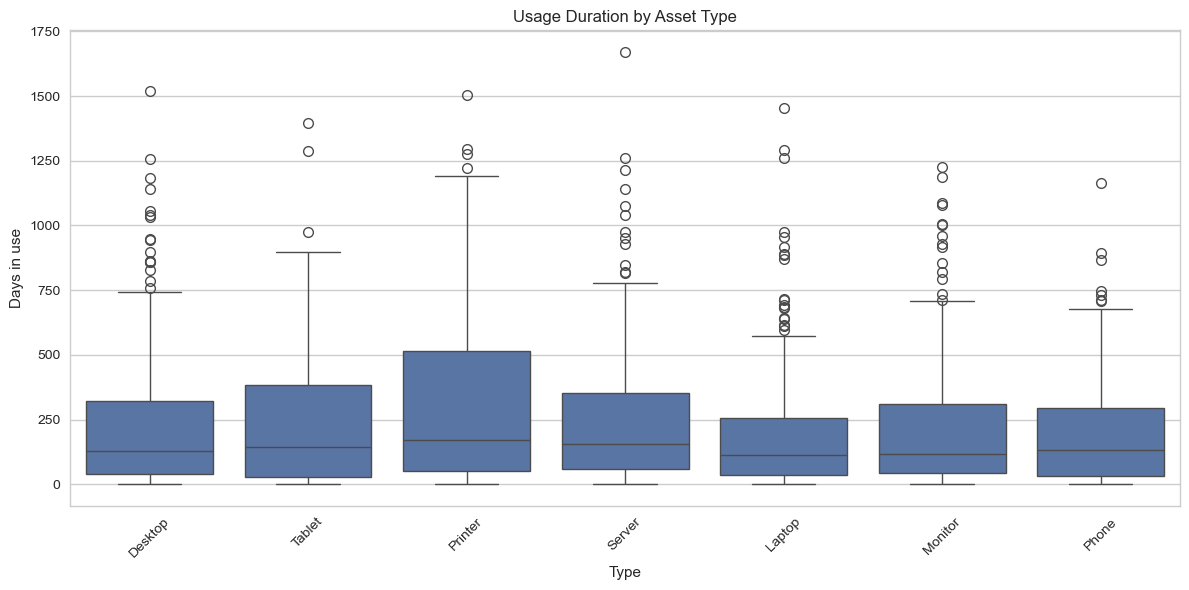

In [801]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Days in use', data=df)
plt.title('Usage Duration by Asset Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Usage_By_Type.png', dpi = 300)
plt.show()

**Key Insights:** 
- `Printers` appear to have the highest median usage `(around 175-200 days)` while `Laptops` are the lowest `(around 125-150 days)`.
- `Printers` also have the highest variability in how long they're kept in service. In contrast, `Laptops` have a narrower IQRs,
  indicating more consistent usage durations.
- All of them appear to have some outliers, particularly a `Server` with approximately `1700 days`. Several other assets have exceeded
  `1000 days` of use.

**Business Recommendations**
- Personal computers tend to be used for shorter durations compared to shared infrastructure assets like `Printers` and `Servers`,
  therefore it is worth considering alternative options for providing to staff members such as leasing as opposed to purchasing outright. 
- Consider extending the replacement cycles for `Printers` and `Servers` since the outliers have demonstrated that they can last for
  longer periods of time.
- Consider **standardization** for `Laptops`, `Phones` and `Desktops` as their shorter life cycle indicates an opportunity to identify
  brands/models that demonstrate longer lifespans.

### Asset spending based on the Department

<Figure size 1200x600 with 0 Axes>

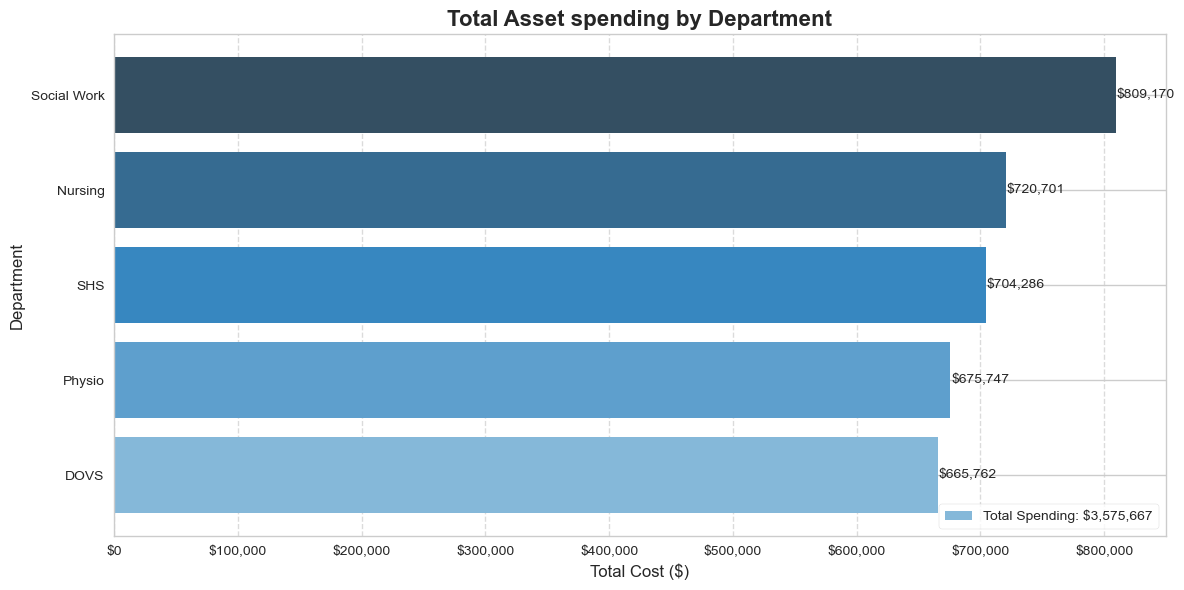

In [773]:
plt.figure(figsize=(12, 6))
dept_costs = df.groupby('Department', observed=True)['Cost'].sum().sort_values()
num_depts = len(dept_costs)
total_cost = dept_costs.sum()

plt.figure(figsize=(12, 6))
colors = sns.color_palette("Blues_d", num_depts)

bars = plt.barh(dept_costs.index, dept_costs.values, color=colors)

plt.title('Total Asset spending by Department', fontsize=16, fontweight='bold')
plt.xlabel('Total Cost ($)', fontsize=12)
plt.ylabel('Department', fontsize=12)

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}')) #Get the current x-axis and use the FuncFormatter to set a '$' sign for the values 

plt.grid(axis='x', linestyle='--', alpha=0.7)

#Annotation for the bar values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}', va='center', fontsize=10)

#Total cost legend
total_label = f"Total Spending: ${total_cost:,.0f}"
plt.legend([total_label], loc='lower right', fontsize=10, frameon=True)

plt.tight_layout()
plt.savefig('Total_Asset_Cost_Dept.png', dpi = 300)
plt.show()

**Key Insights:** 
- `Social Work` appears to have the highest spending for assets at `$808,170` by a considerable margin followed by `Nursing`
   at `$720,701`.
- `DOVS` has spent considerably less than the other departments at `$665,762` (Difference of `$143,408`)

**Business Recommendations**
- Evaluate if `Social Work's` significantly higher spending aligns with asset management priorities.
- Inversely, evaluate `DOVS` cost management strategies for potential means to integrate their efficiency to other departments.
- Study `Social Work` asset portfolio to identify potential **standardization** opportunities.  

### E-waste rate by Type of Asset

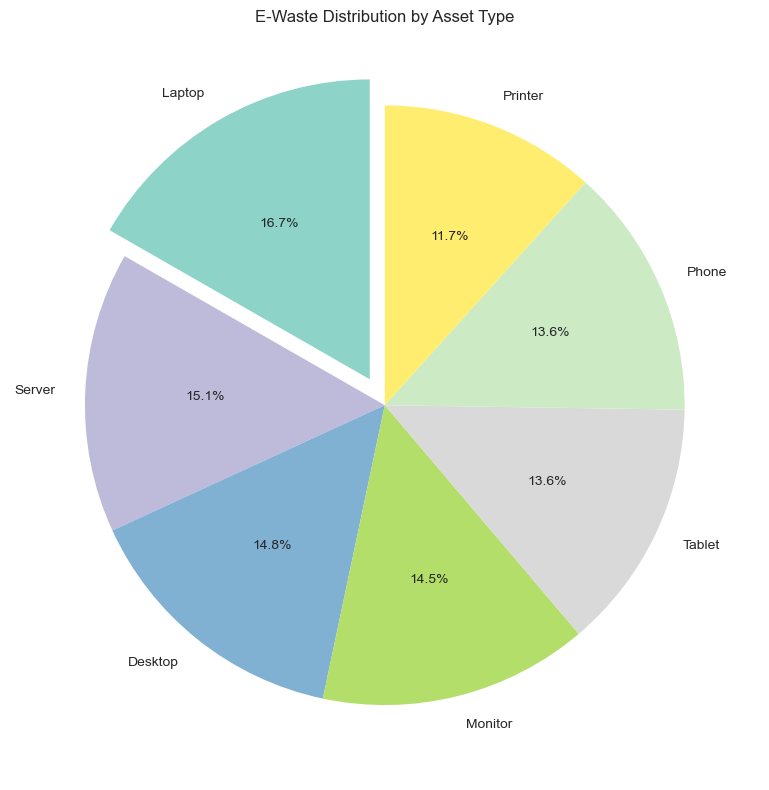

In [717]:
e_wasted = df[df['Is e-wasted'] == True]
e_waste_counts = e_wasted['Type'].value_counts()

#The first slice with index[0] and the highest count, will be exploded and the rest will be set to 0 for the explode array.
explode = [0.1 if i == 0 else 0 for i in range(len(e_waste_counts))] 

plt.figure(figsize=(8, 8))
e_waste_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode = explode, cmap='Set3')
plt.title('E-Waste Distribution by Asset Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Key Insights:** 
- The distribution is fairly even across the `Type` of assets with no category falling below `10%` or exceeding `20%`.
- `Laptop` has the highest e-waste rate at `16.7%`.
- `Laptop`, `Phone` and `Tablet` collectively account for `43.9%` of e-waste.
- `Servers`, `Desktops`, and `Monitors` together make up about `44.4%` of e-waste.
- `Printer` represents the smallest category at `11.7%`, indicating longer lifecycles or significantly fewer units.

In [720]:
df['Type'].value_counts()

Type
Laptop     309
Server     295
Desktop    281
Monitor    281
Tablet     280
Phone      278
Printer    276
Name: count, dtype: int64

**Business Recommendations**
- Evaluate the lifecycle management of `Laptops` to determine the cause of their high percentage of waste.
- Consider more durable `Laptop` brands/manufacturers to address the higher rate of e-waste.
- `Server` and `Desktop` account for `29.9%` of e-waste, so it is worth considering reusing the components to reduce the rate.
- Perform a study on the low e-waste rates for `Printers` and apply best practices to other assets.
- Perform e-waste analysis for the future to measure improvement over time.

### E-waste analysis over Time

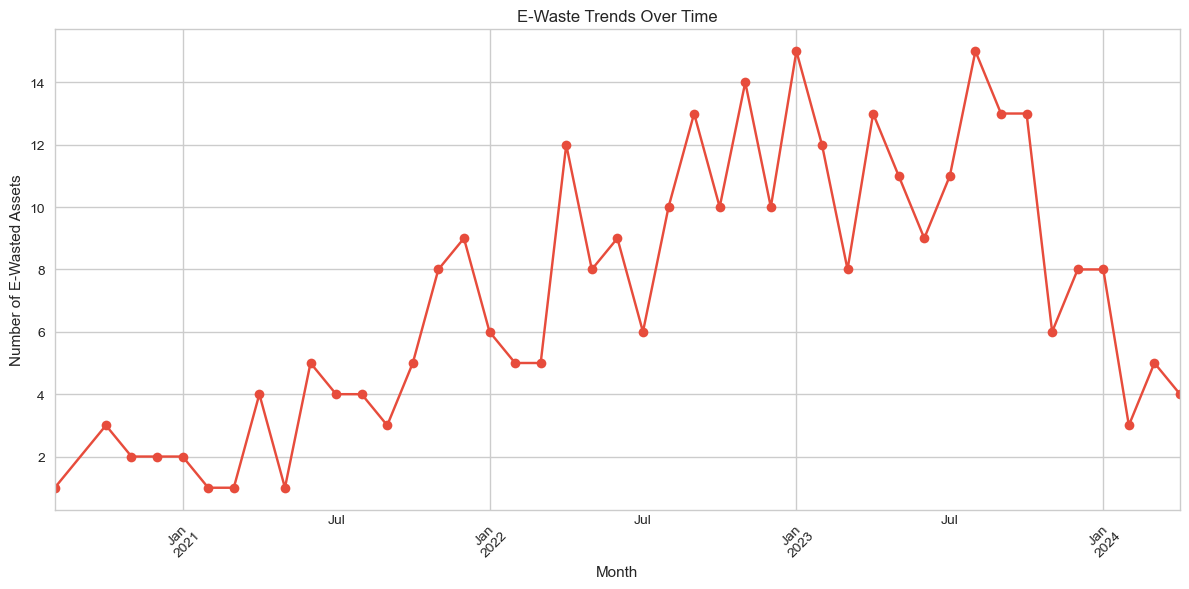

In [726]:
e_wasted = df[df['Is e-wasted'] == True]
monthly_ewaste_count = e_wasted.groupby(df['Date assigned'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
monthly_ewaste_count.plot(kind = "line", marker="o", color='#E74C3C')
plt.title('E-Waste Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of E-Wasted Assets')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Insights:**
- E-waste rates have been steadily increasing since mid of `2020`, but have displayed a dramatic decrease since mid of `2023`.
- The highest months observed are `Jan 2023` and `~ Aug 2023`, indicating that period to be one of the highest for e-wasting.

**Business Recommendations**
- Policies and procedures that were implemented to respond to the high e-waste rates in `2023` appear to be effective,
  so it is recommended to observe the rates closely to ensure long-term effectiveness of the strategy.

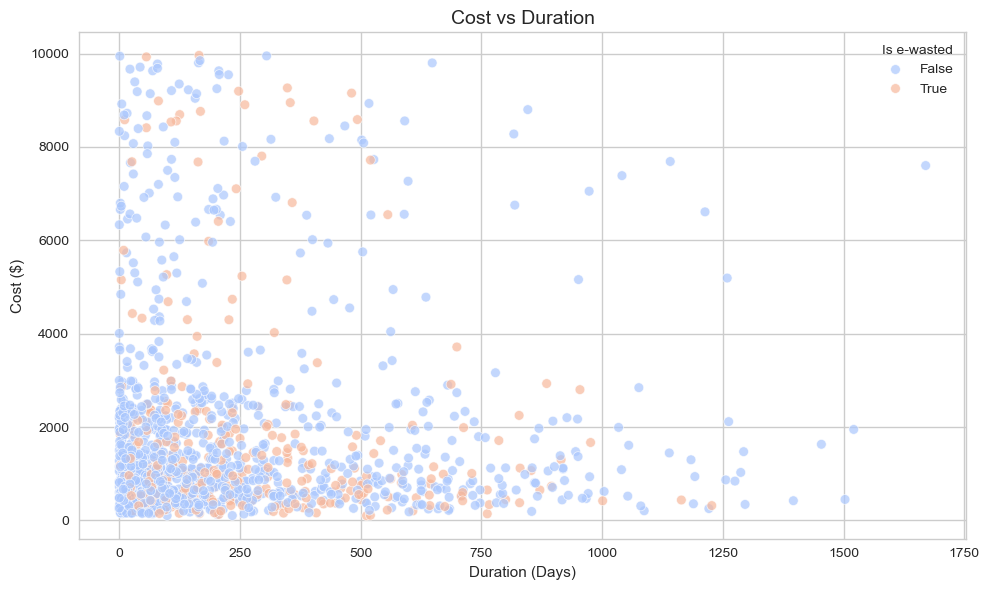

In [803]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Days in use', y='Cost', hue='Is e-wasted', palette='coolwarm', alpha=0.7)

plt.title('Cost vs Duration', fontsize=14)
plt.xlabel('Duration (Days)')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Cost_v_Duration.png', dpi = 300)
plt.show()

**Key Insights:**
- Most of the assets are clustered near the bottom left, indicating cheap assets that have short lifecycles.
- There are a significant number of high cost assets that have a short lifecycle.
- There are a few outliers and most of them have **not** been e-wasted.
- Most of the assets that have been e-wasted are also clustered near the bottom left.

Business Recommendations:
- Low cost assets appear to have shorter lifecycles, so it is recommended evaluate the total cost of ownership (TCO) to determine
  if replacements are leading to long-term costs.
- If the replacement of assets is contributing to higher costs, consider upgrading to slightly higher-cost, longer-lasting assets.
- An analysis of the manufacturer of these assets can provide more information on mitigating costs.
- High number of assets that are high-cost and have short-lifecycles indicate the following possibilities that need investigating:
    - Poor quality
    - Misuse
    - Lack of maintenance
- Investigate alternative options with longer lifecycle.
- Investigate outliers for their high cost/duration effectiveness. These assets are possibly overdue for formal retirement.

---
## Key Recommendations

- Review procurement strategy for high-cost, short-duration assets.
- Evaluate the lifeycle management strategies for `Laptops`, `Monitors` and `Tablets` due to their high e-waste rates as they can be high cost with shorter lifecycles, thus
  creating an opportunity to reduce departmental asset expenses.
- Investigate the significantly higher asset expenses for `Social Work`, while conducting a review of `DOVS` cost management
  strategies for potential implementation strategies for other departments to reduce costs.
- Maintain and observe current e-waste management strategies as they have displayed strong effectiveness in response to the high
  e-waste rates in `2023`.